# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Exploratory Data Analysis

# A new way for checking Missing Data

## Using heatmap

<AxesSubplot:>

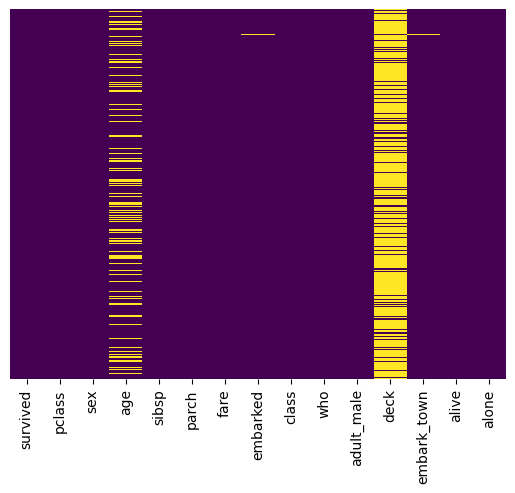

In [4]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

So Age is missing about 20% which can be fixed by imputation. But deck seems too much

In [5]:
df.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

<AxesSubplot:xlabel='survived', ylabel='count'>

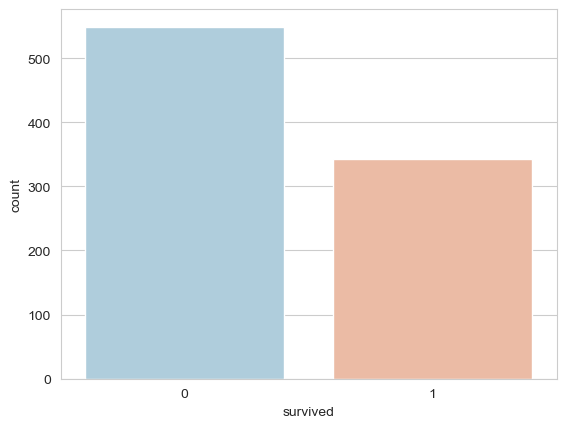

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df, palette='RdBu_r')

<AxesSubplot:xlabel='survived', ylabel='count'>

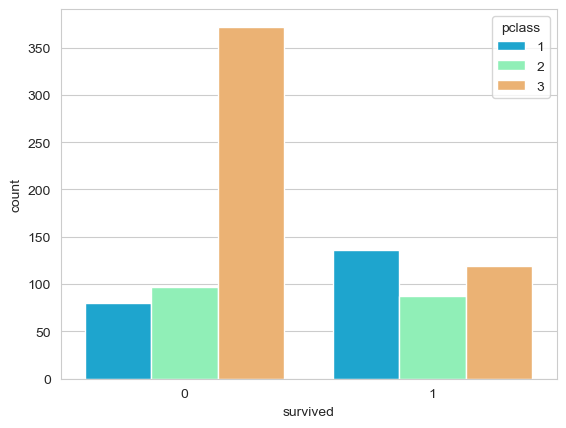

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=df,palette='rainbow')

Now we want to fill in the missing value for Age. However, instead of just using the mean for all passengers, we fill it by the mean by pclass because wealthier passengers tend to be older

<AxesSubplot:xlabel='pclass', ylabel='age'>

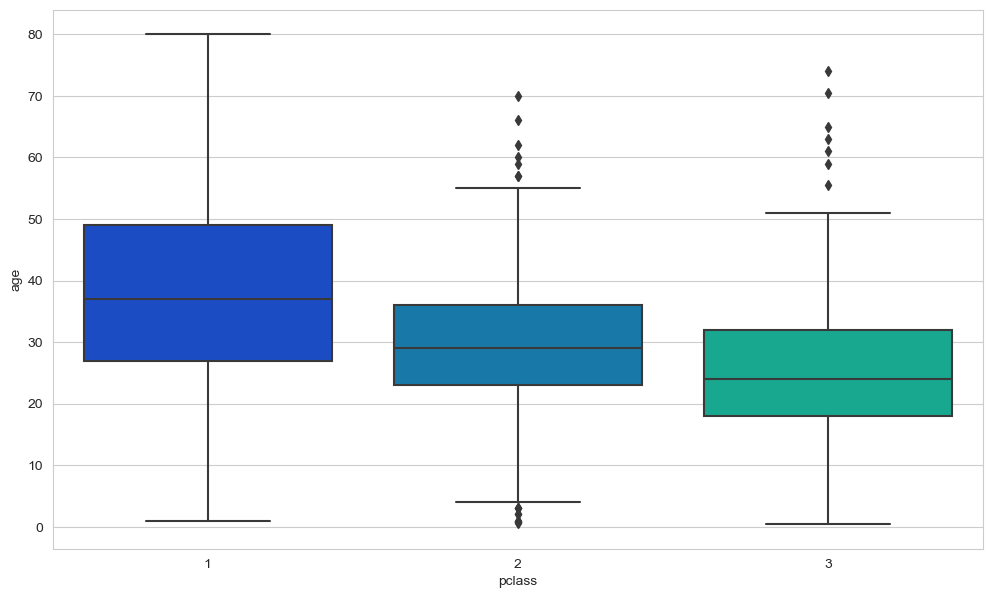

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=df, palette='winter')

In [9]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

Now apply this function

In [10]:
df['age'] = df[['age','pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

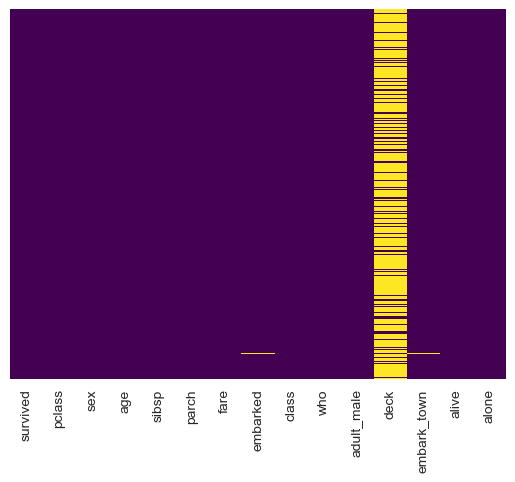

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now deck has too much missing value and so we just drop that column. Also we will simply drop the row that has missing embarked

In [12]:
df.drop('deck', axis=1, inplace = True)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(889, 14)

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:>

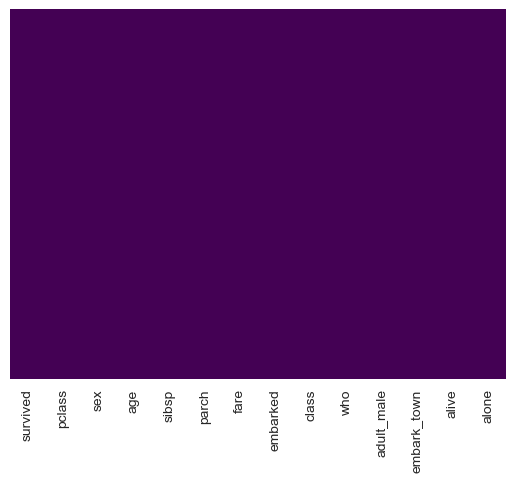

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [18]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [19]:
df = df.reset_index()

In [20]:
df.tail()

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
884,886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
885,887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
886,888,0,3,female,24.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
887,889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
888,890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


# Now let's use just the numerical variables (will come back to revisit)

In [21]:
numerical_df = df[['survived','pclass', 'age', 'sibsp', 'parch', 'fare']]
numerical_df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


# Building a Logistic Regression model

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(numerical_df.drop('survived',axis=1), 
                                                    numerical_df['survived'], test_size=0.20, 
                                                    random_state=101)

## Model Training

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [25]:
predictions = model.predict(X_test)

# Evaluation

In [26]:
from sklearn.metrics import classification_report, accuracy_score

In [27]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       107
           1       0.75      0.56      0.65        71

    accuracy                           0.75       178
   macro avg       0.75      0.72      0.73       178
weighted avg       0.75      0.75      0.74       178

0.7528089887640449


## 65% f1-score, not bad!!

# NOW, let's talk about how to include the categorical variables (such as Sex, and Embarked etc)

<AxesSubplot:xlabel='survived', ylabel='count'>

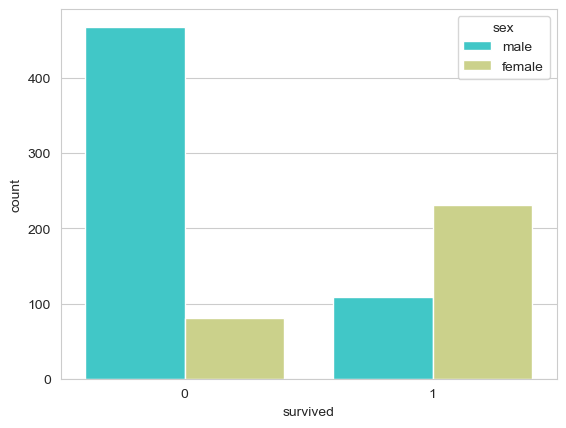

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df,palette='rainbow')

<AxesSubplot:xlabel='survived', ylabel='count'>

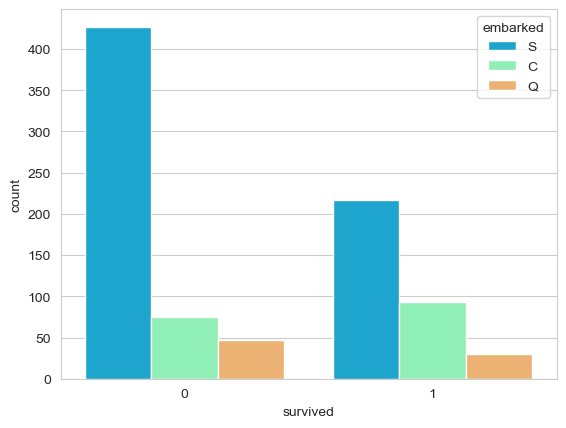

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='embarked',data=df, palette='rainbow')

## Clearly Sex and Embarked makes a difference

# Converting Categorical Features

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_1hot = cat_encoder.fit_transform(df[['sex', 'embarked']])

In [31]:
cat_1hot.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [32]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [33]:
cat_1hot_df = pd.DataFrame(cat_1hot.toarray(), columns = ['female','male','C','Q','S'])
cat_1hot_df.head()

,female,male,C,Q,S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [34]:
cat_1hot_df.tail()

,female,male,C,Q,S
884,0.0,1.0,0.0,0.0,1.0
885,1.0,0.0,0.0,0.0,1.0
886,1.0,0.0,0.0,0.0,1.0
887,0.0,1.0,1.0,0.0,0.0
888,0.0,1.0,0.0,1.0,0.0


In [35]:
cat_1hot_df.shape

(889, 5)

In [36]:
numerical_df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [37]:
numerical_df.shape

(889, 6)

In [38]:
numerical_df.tail()

,survived,pclass,age,sibsp,parch,fare
884,0,2,27.0,0,0,13.00
885,1,1,19.0,0,0,30.00
886,0,3,24.0,1,2,23.45
887,1,1,26.0,0,0,30.00
888,0,3,32.0,0,0,7.75


In [39]:
full_df = pd.concat([numerical_df, cat_1hot_df], axis=1)
full_df.head()

,survived,pclass,age,sibsp,parch,fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [40]:
full_df.shape

(889, 11)

## So we have 5 more features (2 from sex, 3 from embarked)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(full_df.drop('survived',axis=1), 
                                                    full_df['survived'], test_size=0.30, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267

0.8239700374531835


## Wonderful, we have increased our F1-score from 65% to 75%

# Great Job